In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [133]:
def epochtime_to_time(epochtime_list):
    return [datetime.utcfromtimestamp(epochtime).time().isoformat() for epochtime in epochtime_list]


def boxplot(data, title, show_fliers = True):
    plt.figure(figsize=(15, 6))

    plt.boxplot(data, vert = False, showfliers = show_fliers, flierprops=dict(markersize=10))
    plt.yticks([])

    if show_fliers:
        plt.xticks(np.linspace(0, max(data), 15), rotation=45, ha="right", rotation_mode="anchor", fontsize=16)
    else:
        plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=16)

    plt.title(title, fontsize=20)

    plt.xlabel("Time (ms)", fontsize=18)
    plt.grid(axis="x")

    plt.show()


def print_stats(data):
    print(f"Median: {np.median(data)}")
    print(f"Mean: {np.mean(data)}")
    print(f"Std: {np.std(data)}")
    print(f"Max: {max(data)}")


def lineplot(data_dict, title, xlabel, ylabel):
    plt.figure(figsize=(15, 8))

    max_len = 0
    for k, v in data_dict.items():
        plt.plot(v, label = k)
        
        max_len = max(max_len, len(v))


    plt.xticks(np.arange(0, max_len, 250), rotation=45, ha="right", rotation_mode="anchor", fontsize=16)
    plt.yticks(fontsize=16)

    plt.title(title, fontsize=20)

    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)

    if len(data_dict) > 1:
        plt.legend(loc="upper right", fontsize=18)

    plt.show()


def versusplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15, 8))

    plt.plot(x, y)

    plt.xticks(x, epochtime_to_time(x), rotation=45, ha="right", rotation_mode="anchor", fontsize=18)

    plt.title(title, fontsize=20)

    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)

    plt.show()

# Group Filter - Group Filter Aggregator Communication Performance

In [110]:
with open("../../../../data/gf_gfa_communication_latency.txt") as f:
    gf_gfa_communication_latency = f.read()

In [111]:
gf_gfa_communication_latency_arr = gf_gfa_communication_latency.split("Message waited for ")

zeromq_delay = []
for t in gf_gfa_communication_latency_arr[1:]:
    zeromq_delay.append(float(t.split(" ")[0]) * 1000)

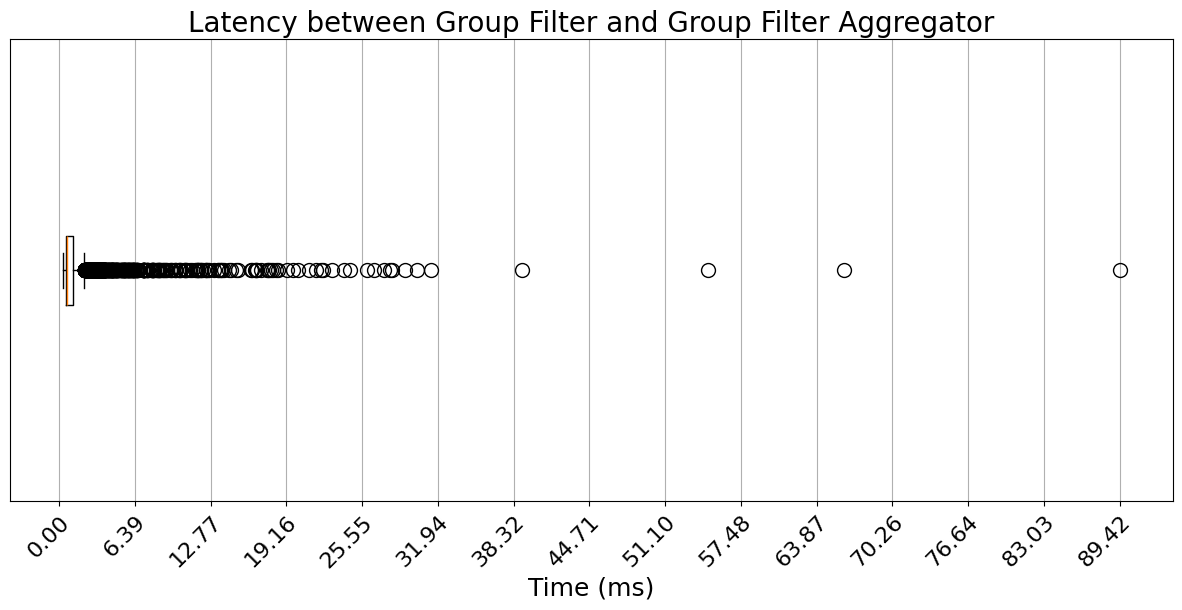

In [113]:
boxplot(zeromq_delay, "Latency between Group Filter and Group Filter Aggregator")

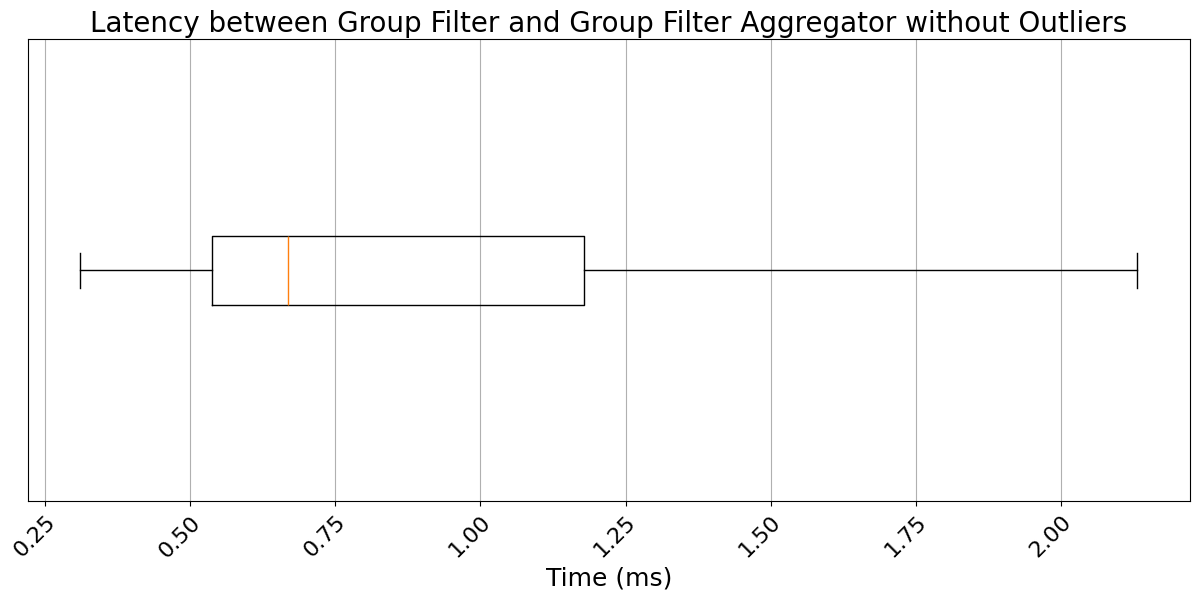

In [114]:
boxplot(zeromq_delay, "Latency between Group Filter and Group Filter Aggregator without Outliers", False)

In [115]:
print_stats(zeromq_delay)

Median: 0.6692609749734402
Mean: 1.0962402802006403
Std: 1.9489762674755031
Max: 89.41914094612002


# OpenFace Performance

In [116]:
with open("../../../../data/openface_1.txt") as f:
    openface_1 = f.read()

with open("../../../../data/openface_2.txt") as f:
    openface_2 = f.read()

In [117]:
openface_1_arr = []
for t in openface_1.split("All: ")[1:]:
    openface_1_arr.append(float(t.split("\n")[0]) * 1000)

openface_2_arr = []
for t in openface_2.split("All: ")[1:]:
    openface_2_arr.append(float(t.split("\n")[0]) * 1000)

openface_arr = openface_1_arr + openface_2_arr

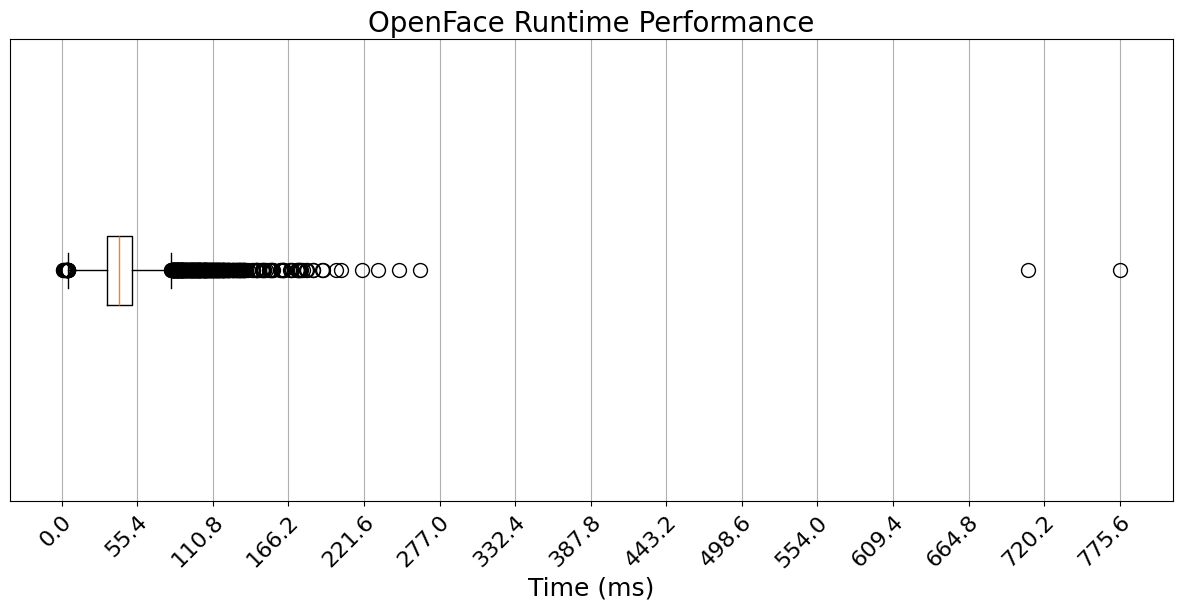

In [118]:
boxplot(openface_arr, "OpenFace Runtime Performance")

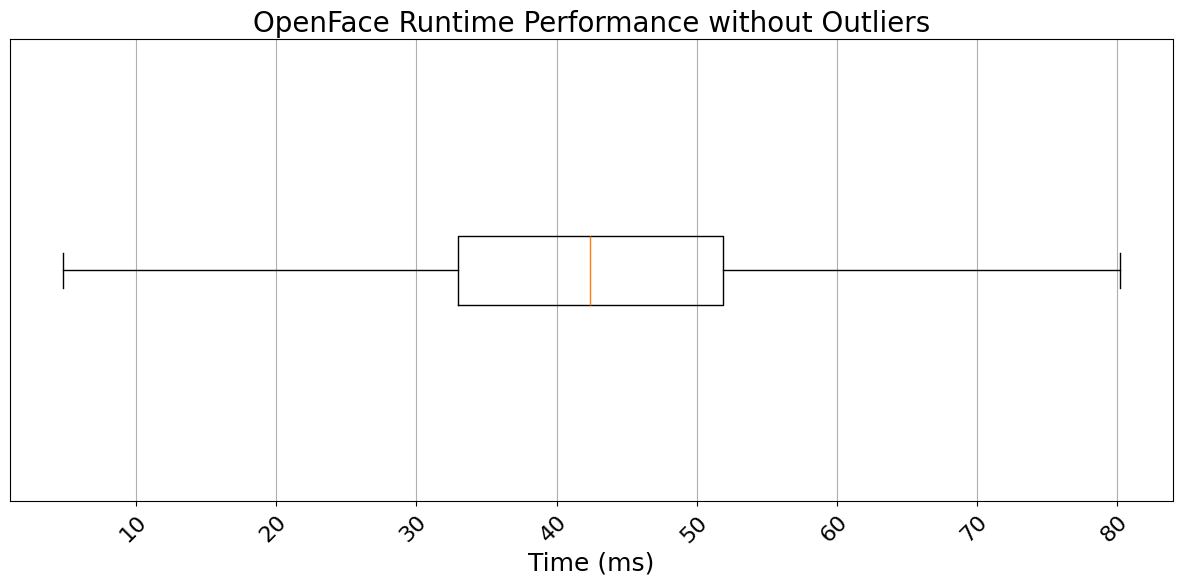

In [119]:
boxplot(openface_arr, "OpenFace Runtime Performance without Outliers", False)

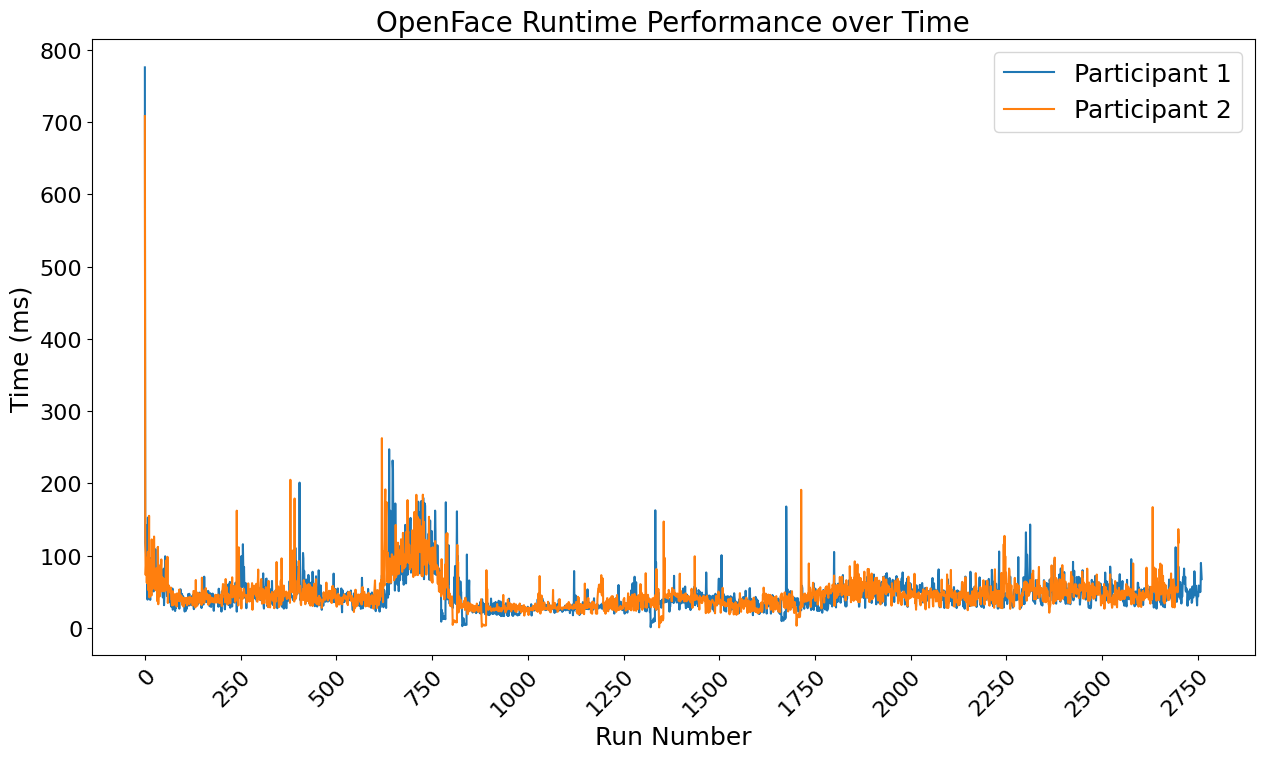

In [134]:
lineplot(
    {
        "Participant 1": openface_1_arr,
        "Participant 2": openface_2_arr
    }, 
    "OpenFace Runtime Performance over Time", 
    "Run Number",
    "Time (ms)"
)

In [121]:
print_stats(openface_arr)

Median: 42.3565
Mean: 46.41611973636031
Std: 26.04719213760536
Max: 775.573


# Synchrony Score Group Filter Performance

In [136]:
with open("../../../../data/sync_score_output.txt") as f:
    ss_perf_str = f.read()

In [137]:
ss_perf_arr = ss_perf_str.split("Time:")

perf_counter = []
sync_score = []
for t in ss_perf_arr[1:]:
    perf_counter.append(float(t.split("\n")[0]))

    sync_score.append(float(t[t.index("Result:") + 8:].split("\n")[0]))

sync_score_refresh_latency = [(dt - perf_counter[i - 1]) * 1000 for i, dt in enumerate(perf_counter)][1:]

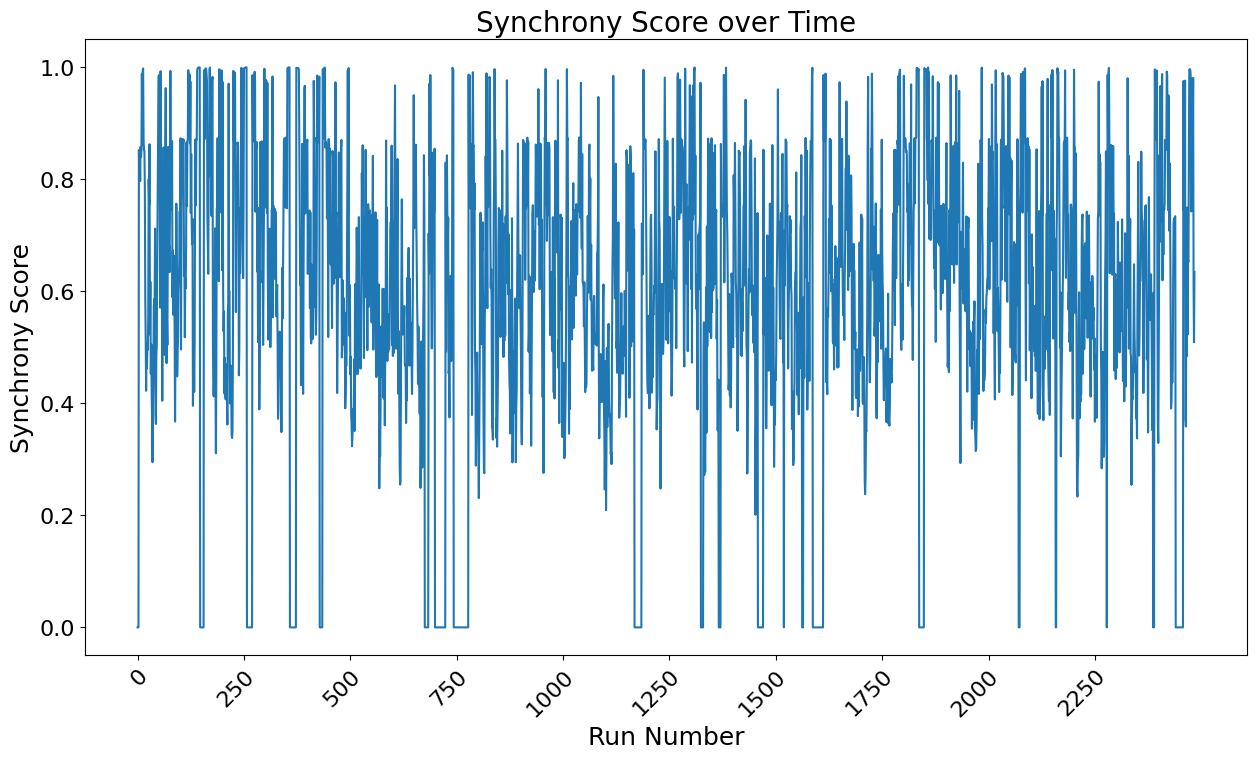

In [138]:
lineplot({"sync_score": sync_score}, "Synchrony Score over Time", "Run Number", "Synchrony Score")

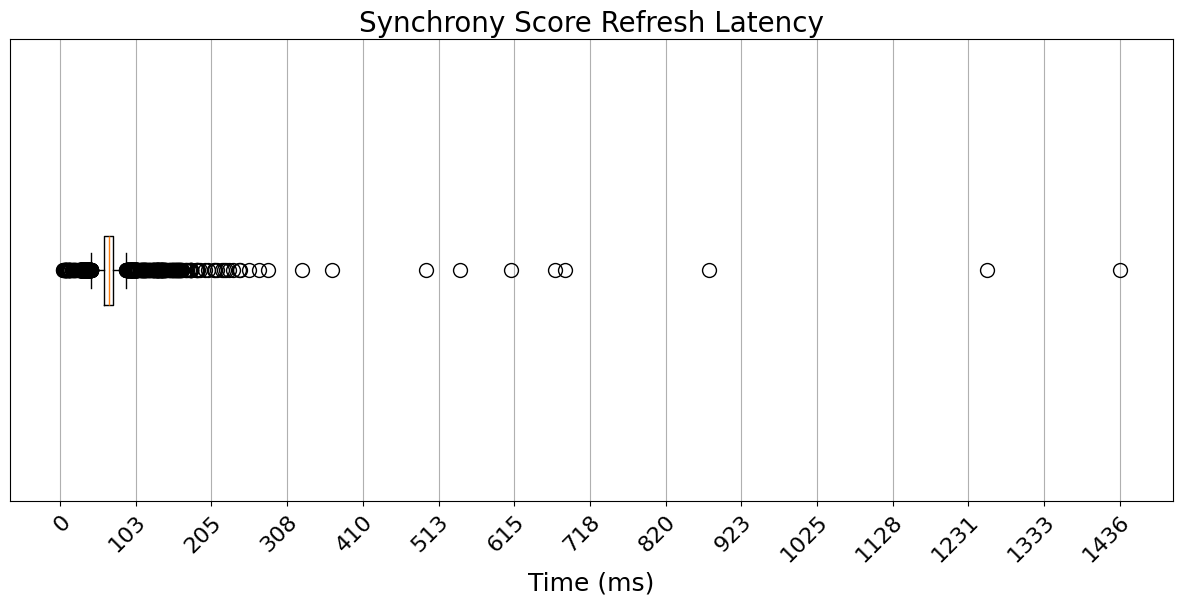

In [139]:
boxplot(sync_score_refresh_latency, "Synchrony Score Refresh Latency")

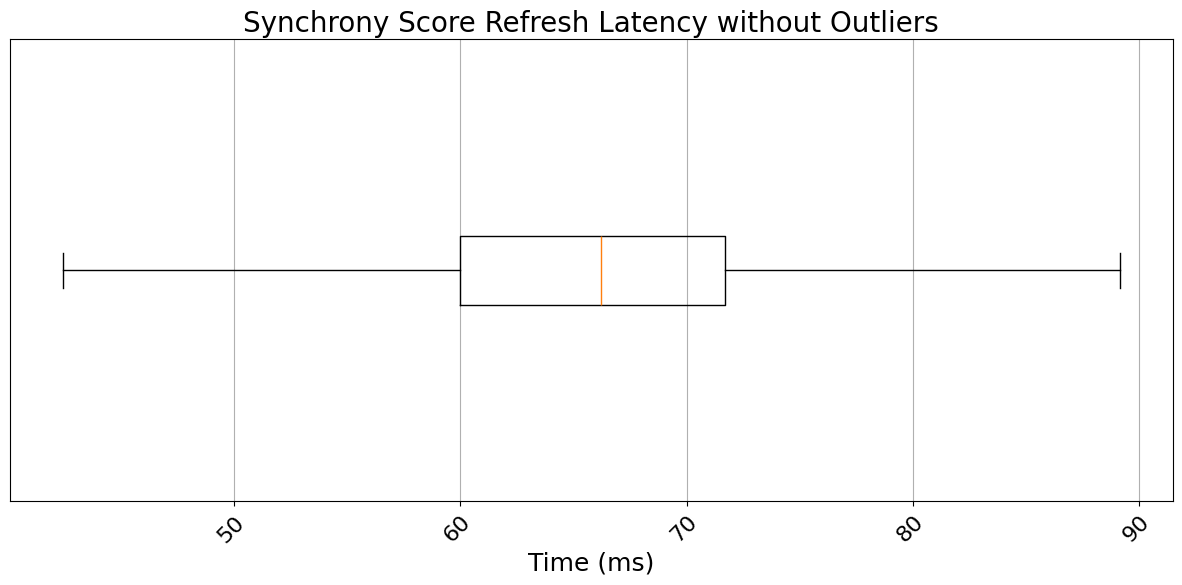

In [140]:
boxplot(sync_score_refresh_latency, "Synchrony Score Refresh Latency without Outliers", False)

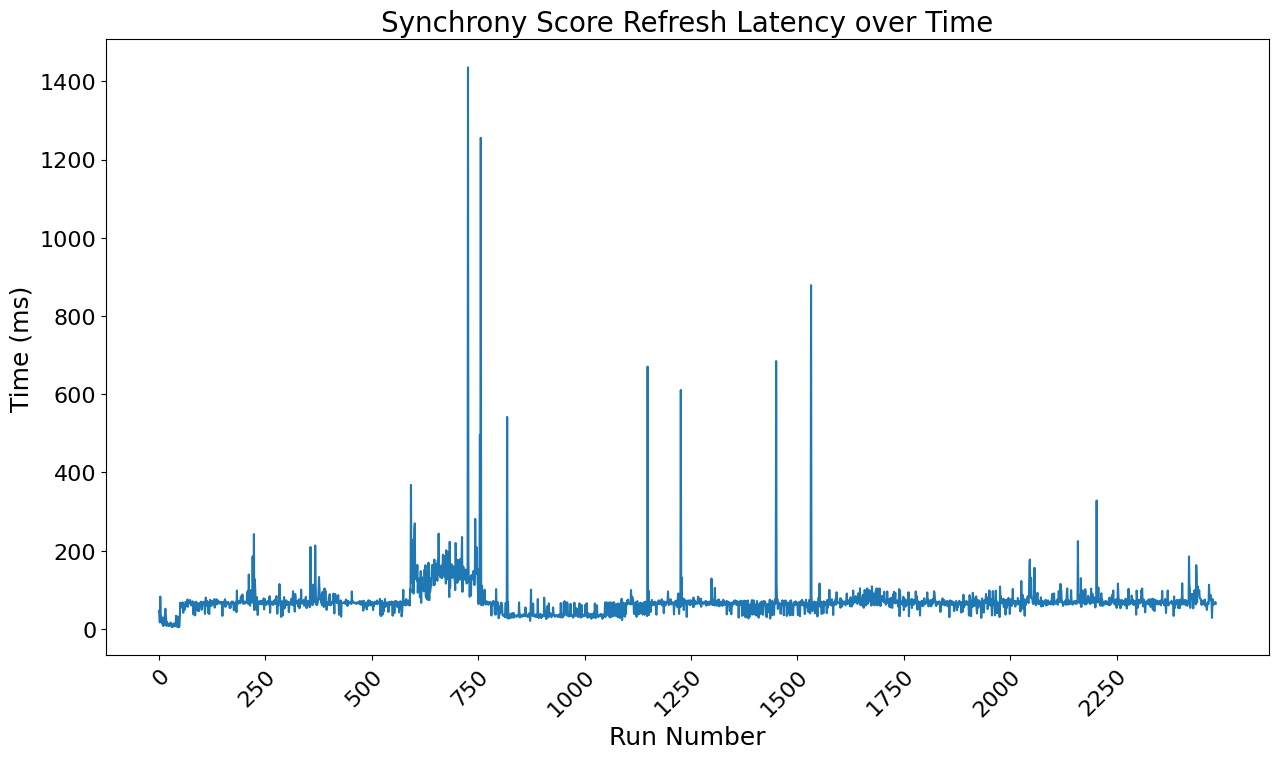

In [141]:
lineplot(
    {
        "synch_score_refresh_freq": sync_score_refresh_latency
    }, 
    "Synchrony Score Refresh Latency over Time", 
    "Run Number", 
    "Time (ms)"
)

In [145]:
print_stats(sync_score_refresh_latency)

Median: 66.20906048920006
Mean: 70.49758416741498
Std: 54.908555884536966
Max: 1435.6144121848047
